In [1]:
# ------------------------------------
# Cell 1: Setup and Imports
# ------------------------------------

import numpy as np 
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# For data structure (in case you have a CSV)
import pandas as pd 

print("Libraries loaded successfully.")

# Set a style for better visualization
plt.style.use('ggplot')

Libraries loaded successfully.


In [2]:
# ------------------------------------
# Cell 2: Define Data Directory and Utility Function
# ------------------------------------

# **CRITICAL**: The path you provided
DATA_DIR = '/kaggle/input/face-images' 

print(f"Target data directory: {DATA_DIR}")

def get_all_image_paths(root_dir):
    """Recursively collects all image file paths (JPG, PNG) from a directory."""
    image_files = []
    
    # Define common image extensions
    image_extensions = ('.png', '.jpg', '.jpeg')
    
    # Walk through the directory structure
    for dirname, _, filenames in os.walk(root_dir):
        for filename in filenames:
            # Check if the file is an image and is not a hidden file
            if filename.lower().endswith(image_extensions) and not filename.startswith('.'):
                image_files.append(os.path.join(dirname, filename))
    return image_files
    
print("Utility function to find images defined.")

Target data directory: /kaggle/input/face-images
Utility function to find images defined.


In [3]:
# ------------------------------------
# Cell 3: Initial Data Exploration
# ------------------------------------

# 1. List contents of the top-level directory (useful for seeing subfolders or CSVs)
print("Contents of the top-level directory:")
print(os.listdir(DATA_DIR))

# 2. Collect all image paths
all_image_paths = get_all_image_paths(DATA_DIR)

total_images = len(all_image_paths)
print(f"\nTotal images found: {total_images}")

if total_images > 0:
    print(f"Example of a full image path: {all_image_paths[0]}")
    # Show the first few file names for a quick check
    print(f"First 5 image files: {[os.path.basename(p) for p in all_image_paths[:5]]}")
else:
    print("\n--- No images found. Please verify the folder structure inside '/kaggle/input/face-images' ---")

Contents of the top-level directory:
['Faceimages']

Total images found: 138
Example of a full image path: /kaggle/input/face-images/Faceimages/7/Selfie_2.jpg
First 5 image files: ['Selfie_2.jpg', 'ID_2.jpg', 'ID_1.jpg', 'Selfie_1.jpg', 'Selfie_7.jpg']


Displaying 9 random sample faces:


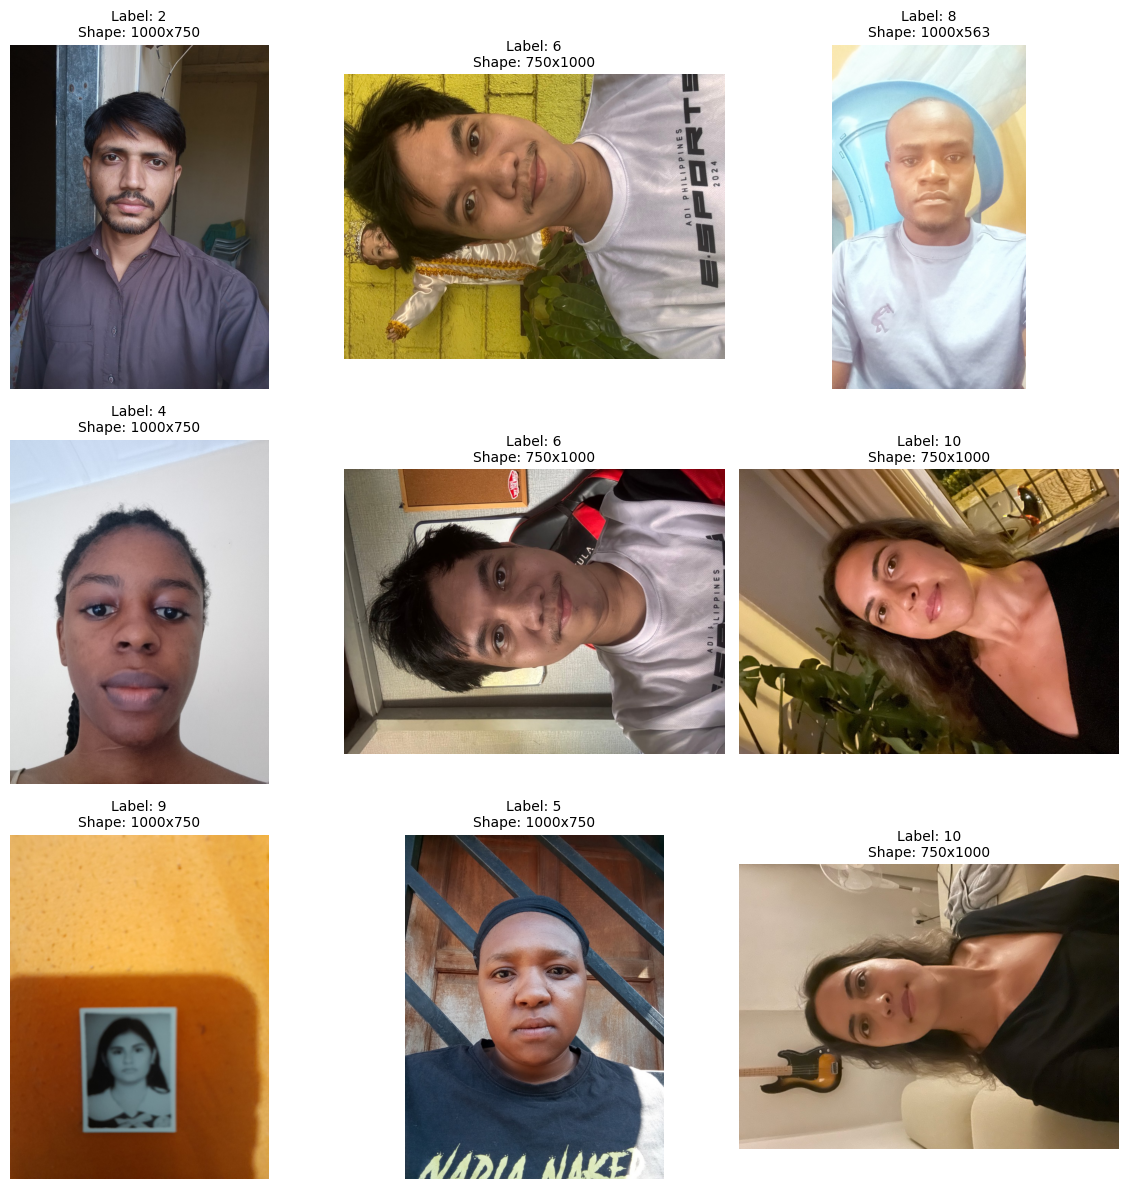

In [4]:
# ------------------------------------
# Cell 4: Display Sample Images
# ------------------------------------

if len(all_image_paths) > 0:
    # Set display parameters (max 9 images in a 3x3 grid)
    display_count = min(len(all_image_paths), 9)
    sample_files = random.sample(all_image_paths, display_count)
    
    # Calculate grid size (e.g., 9 images = 3x3; 5 images = 2x3)
    rows = int(np.ceil(display_count / 3))
    
    fig, axes = plt.subplots(rows, 3, figsize=(12, 4 * rows))
    axes = axes.flatten()

    print(f"Displaying {display_count} random sample faces:")
    
    for i, img_path in enumerate(sample_files):
        try:
            img = Image.open(img_path)
            
            # Display the image
            axes[i].imshow(img)
            
            # Attempt to extract the "Label" (parent folder name)
            label = os.path.basename(os.path.dirname(img_path))
            
            # Format the title
            title_info = f"Label: {label}\nShape: {img.size[1]}x{img.size[0]}"
            axes[i].set_title(title_info, fontsize=10)
            axes[i].axis('off')
            
        except Exception as e:
            axes[i].set_title(f"Error: {os.path.basename(img_path)}", fontsize=10)
            axes[i].axis('off')

    # Hide unused subplots
    for i in range(display_count, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

else:
    print("Cannot display images, as no images were found in the dataset.")

--- Labeled DataFrame Head ---
                                                path label
0  /kaggle/input/face-images/Faceimages/7/Selfie_...     7
1    /kaggle/input/face-images/Faceimages/7/ID_2.jpg     7
2    /kaggle/input/face-images/Faceimages/7/ID_1.jpg     7
3  /kaggle/input/face-images/Faceimages/7/Selfie_...     7
4  /kaggle/input/face-images/Faceimages/2/Selfie_...     2

--- Label Distribution ---
Total unique faces/classes found: 10
Count of images per label (Top 10):
label
2     15
10    15
5     15
8     15
3     15
1     15
4     15
6     15
9     14
7      4


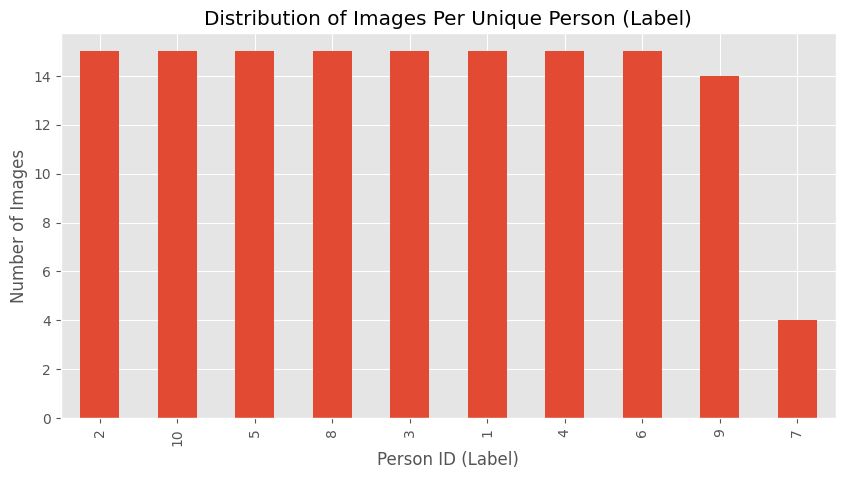

In [5]:
# ------------------------------------
# Cell 5: Create a Labeled DataFrame
# ------------------------------------

# List to hold the image data (path and label)
data_list = []

# Define the root of the image folders based on your previous output
# This is the directory *before* the person/subject ID (the '7' in your example)
ROOT_IMAGE_FOLDER = os.path.join(DATA_DIR, 'Faceimages')

# Go through all image paths to extract the label (the folder name)
for img_path in all_image_paths:
    # Example Path: /kaggle/input/face-images/Faceimages/7/Selfie_2.jpg
    
    # 1. Split the path from the root down to the label:
    # The part we want is immediately after ROOT_IMAGE_FOLDER
    relative_path = os.path.relpath(img_path, ROOT_IMAGE_FOLDER)
    
    # 2. The first part of the relative path is the label (e.g., '7')
    # os.path.normpath is used to handle different separators across systems
    label = os.path.normpath(relative_path).split(os.sep)[0]
    
    data_list.append({
        'path': img_path,
        'label': label
    })

# Convert the list to a Pandas DataFrame
df = pd.DataFrame(data_list)

print("--- Labeled DataFrame Head ---")
print(df.head())

print("\n--- Label Distribution ---")
# Count the number of images per unique label/person
label_counts = df['label'].value_counts()
print(f"Total unique faces/classes found: {len(label_counts)}")
print("Count of images per label (Top 10):")
print(label_counts.head(10).to_string())

# Plot the distribution of images per person
plt.figure(figsize=(10, 5))
label_counts.plot(kind='bar')
plt.title('Distribution of Images Per Unique Person (Label)')
plt.xlabel('Person ID (Label)')
plt.ylabel('Number of Images')
plt.show()

Starting analysis on 138 images...
Analysis complete.
Files that failed to load (corrupted/non-image): 0

--- Image Dimension Statistics ---
Minimum Width: 448 pixels
Maximum Width: 1000 pixels
Average Width: 753.04 pixels
------------------------------
Minimum Height: 750 pixels
Maximum Height: 1000 pixels
Average Height: 942.89 pixels

--- Channel Distribution (Color vs. Grayscale) ---
3    138


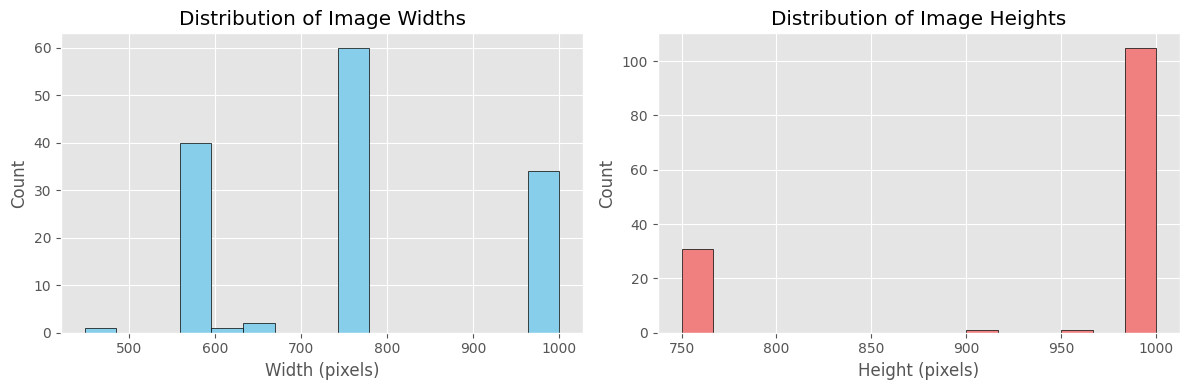

In [6]:
# ------------------------------------
# Cell 6: Image Dimension and Channel Analysis (Preprocessing Check)
# ------------------------------------

# Lists to store the properties
widths = []
heights = []
channels = []
corrupted_files = []

# Use the 'path' column from your generated DataFrame 'df'
image_paths_to_analyze = df['path'].tolist() 

print(f"Starting analysis on {len(image_paths_to_analyze)} images...")

for img_path in image_paths_to_analyze:
    try:
        # Open the image using PIL
        img = Image.open(img_path)
        
        # Convert to numpy array to check dimensions/channels
        img_np = np.array(img)
        
        # Get dimensions and channels
        if img_np.ndim == 3:
            h, w, c = img_np.shape
            channels.append(c)
        elif img_np.ndim == 2:
            # Grayscale image (1 channel)
            h, w = img_np.shape
            c = 1
            channels.append(c)
        else:
            # Unexpected format
            continue

        widths.append(w)
        heights.append(h)
        
    except Exception as e:
        # Log any files that cannot be opened
        corrupted_files.append(img_path)
        
print("Analysis complete.")
print(f"Files that failed to load (corrupted/non-image): {len(corrupted_files)}")
if corrupted_files:
    print(f"First 5 corrupted file names: {[os.path.basename(p) for p in corrupted_files[:5]]}")


# --- Summarize and Visualize Dimensions ---
if widths:
    # 1. Image Dimension Statistics
    print("\n--- Image Dimension Statistics ---")
    print(f"Minimum Width: {np.min(widths)} pixels")
    print(f"Maximum Width: {np.max(widths)} pixels")
    print(f"Average Width: {np.mean(widths):.2f} pixels")
    print("-" * 30)
    print(f"Minimum Height: {np.min(heights)} pixels")
    print(f"Maximum Height: {np.max(heights)} pixels")
    print(f"Average Height: {np.mean(heights):.2f} pixels")
    
    # 2. Channel Distribution
    channel_counts = pd.Series(channels).value_counts().sort_index()
    print("\n--- Channel Distribution (Color vs. Grayscale) ---")
    print(channel_counts.to_string())

    # 3. Plot a histogram of heights and widths
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].hist(widths, bins=15, color='skyblue', edgecolor='black')
    axes[0].set_title('Distribution of Image Widths')
    axes[0].set_xlabel('Width (pixels)')
    axes[0].set_ylabel('Count')

    axes[1].hist(heights, bins=15, color='lightcoral', edgecolor='black')
    axes[1].set_title('Distribution of Image Heights')
    axes[1].set_xlabel('Height (pixels)')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()
else:
    print("No valid images were processed.")

In [7]:
# ------------------------------------
# Cell 7: Data Split (65% Train / 35% Test)
# ------------------------------------

from sklearn.model_selection import train_test_split

# Define the features (path) and the target (label)
X = df['path']
y = df['label']

# Split the data using a 35% test size (65% training)
TEST_RATIO = 0.35 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=TEST_RATIO, 
    random_state=42, 
    shuffle=True,
    stratify=y # Crucial for keeping the person distribution consistent
)

# Convert the results back into DataFrames for easier use
df_train = pd.DataFrame({'path': X_train, 'label': y_train}).reset_index(drop=True)
df_test = pd.DataFrame({'path': X_test, 'label': y_test}).reset_index(drop=True)

print(f"Total dataset size: {len(df)}")
print(f"Training set size (65%): {len(df_train)} images")
print(f"Testing set size (35%): {len(df_test)} images")

print("\n--- Training Set Label Distribution Check ---")
train_counts = df_train['label'].value_counts().sort_index()
print(train_counts.to_string())

print("\n--- Testing Set Label Distribution Check ---")
test_counts = df_test['label'].value_counts().sort_index()
print(test_counts.to_string())

# Note on the small class '7': 
# Original: 4 images. 4 * 0.65 = 2.6 (Train) and 4 * 0.35 = 1.4 (Test). 
# Stratification will assign 3 to train and 1 to test (or 2/2).
# This is why stratification is vital for small, imbalanced classes!

Total dataset size: 138
Training set size (65%): 89 images
Testing set size (35%): 49 images

--- Training Set Label Distribution Check ---
label
1     10
10    10
2     10
3      9
4     10
5     10
6      9
7      2
8     10
9      9

--- Testing Set Label Distribution Check ---
label
1     5
10    5
2     5
3     6
4     5
5     5
6     6
7     2
8     5
9     5


In [8]:
# ------------------------------------
# Cell 8: Image Preprocessing Function (Recap)
# ------------------------------------

# Define the target size for the model input (based on our previous decision)
TARGET_SIZE = (160, 160) 

def preprocess_image(img_path, target_size=TARGET_SIZE):
    """
    Loads, resizes, and normalizes an image for model input.
    """
    try:
        # Load image (ensure 3 channels)
        img = Image.open(img_path).convert('RGB') 
        
        # Resize image
        img = img.resize(target_size)
        
        # Convert to a NumPy array (dtype float32 is good practice for Keras input)
        img_array = np.array(img, dtype=np.float32)
        
        # Normalize pixel values to the range [0, 1]
        img_array = img_array / 255.0
        
        return img_array
        
    except Exception as e:
        # In a batch load, we'll return None for corrupted files
        return None

print(f"Image preprocessing function defined. All images will be resized to {TARGET_SIZE}.")

Image preprocessing function defined. All images will be resized to (160, 160).


In [9]:
# ------------------------------------
# Cell 9: Load Images and Encode Labels
# ------------------------------------

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding Setup
# We must fit the encoder on the ENTIRE dataset's labels to ensure
# all 10 unique IDs (1, 2, ... 10) are mapped correctly.
label_encoder = LabelEncoder()
label_encoder.fit(df['label'])

# Get the number of classes (should be 10)
NUM_CLASSES = len(label_encoder.classes_)
print(f"Total number of classes (unique faces): {NUM_CLASSES}")


def load_data(df, encoder):
    """Loads images and converts labels to one-hot encoding."""
    X_data = [] # To hold image arrays
    y_labels = [] # To hold encoded labels
    
    # Use tqdm to show a progress bar (useful for larger datasets)
    # If tqdm is not installed, you can remove 'tqdm' from the imports and the loop
    try:
        from tqdm.notebook import tqdm
        iterable = tqdm(df.itertuples(), total=len(df), desc="Loading Data")
    except ImportError:
        iterable = df.itertuples()

    for row in iterable:
        img_array = preprocess_image(row.path)
        
        if img_array is not None:
            X_data.append(img_array)
            y_labels.append(row.label)

    # 2. Convert labels to integer indices (0 to 9)
    y_encoded = encoder.transform(y_labels)
    
    # 3. Convert integer indices to one-hot vectors
    y_one_hot = to_categorical(y_encoded, num_classes=NUM_CLASSES)
    
    # 4. Convert list of images to final NumPy array
    X_final = np.array(X_data)
    
    return X_final, y_one_hot

# --- Load Training Data ---
X_train, y_train_cat = load_data(df_train, label_encoder)
print(f"\nTraining data loaded. X_train shape: {X_train.shape}, y_train_cat shape: {y_train_cat.shape}")

# --- Load Testing Data ---
X_test, y_test_cat = load_data(df_test, label_encoder)
print(f"Testing data loaded. X_test shape: {X_test.shape}, y_test_cat shape: {y_test_cat.shape}")

2025-10-14 22:59:50.043430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760482790.288317      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760482790.357513      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Total number of classes (unique faces): 10


Loading Data:   0%|          | 0/89 [00:00<?, ?it/s]


Training data loaded. X_train shape: (89, 160, 160, 3), y_train_cat shape: (89, 10)


Loading Data:   0%|          | 0/49 [00:00<?, ?it/s]

Testing data loaded. X_test shape: (49, 160, 160, 3), y_test_cat shape: (49, 10)


In [10]:
# ------------------------------------
# Cell 10: Dlib Setup and Landmark Detection (FINAL FIX)
# ------------------------------------

import cv2
import dlib
from imutils import face_utils
import math
import numpy as np
import matplotlib.pyplot as plt

# FINAL CORRECT PATH
DLIB_MODEL_PATH = '/kaggle/input/shape-predictor-68-face-landmarks/shape_predictor_68_face_landmarks.dat' 

# Initialize dlib's face detector (HOG-based) and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = None
try:
    predictor = dlib.shape_predictor(DLIB_MODEL_PATH)
    print(f"Dlib predictor loaded successfully from: {DLIB_MODEL_PATH}")
except Exception as e:
    print(f"FATAL ERROR: Dlib predictor failed to load, even with the correct path. Check library versions. Error: {e}")
    
    
def get_landmarks_and_face(image_path):
    """
    Detects a face in the image and returns the 68 landmarks and the image.
    """
    global predictor
    if predictor is None:
        return None, None
        
    # 1. Load the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        return None, None
    
    # Resize for faster processing
    image = cv2.resize(image, (640, int(image.shape[0] * 640 / image.shape[1])))
    
    # Dlib works on grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 2. Detect faces
    rects = detector(gray, 1) 
    
    if len(rects) == 0:
        return None, image
    
    # 3. Use the first detected face
    rect = rects[0]
    
    # 4. Determine the facial landmarks
    shape = predictor(gray, rect)
    landmarks = face_utils.shape_to_np(shape)
    
    return landmarks, image

# Test the function with a random image path from the DataFrame
test_path = df['path'].sample(1).iloc[0]
test_landmarks, test_image = get_landmarks_and_face(test_path)

if test_landmarks is not None:
    print(f"\nSuccessfully detected landmarks for a test image. Shape: {test_landmarks.shape}")
    
    # Visualize the landmarks
    for (x, y) in test_landmarks:
        cv2.circle(test_image, (x, y), 2, (0, 255, 0), -1) 
    
    # Convert BGR (OpenCV) to RGB (Matplotlib) for display
    test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(test_image_rgb)
    plt.title("Face Detected with 68 Landmarks (Verification)")
    plt.axis('off')
    plt.show()
else:
    print(f"\nCould not detect a face in the test image: {os.path.basename(test_path)}. (Check image quality/angle if this happens frequently).")

Dlib predictor loaded successfully from: /kaggle/input/shape-predictor-68-face-landmarks/shape_predictor_68_face_landmarks.dat

Could not detect a face in the test image: Selfie_12.jpg. (Check image quality/angle if this happens frequently).


In [11]:
# ------------------------------------
# Cell 11: Feature Measurement and Profiling Analysis
# ------------------------------------

def euclidean_distance(ptA, ptB):
    """Calculates the distance between two (x, y) points."""
    return math.sqrt((ptA[0] - ptB[0])**2 + (ptA[1] - ptB[1])**2)

def calculate_facial_features(landmarks):
    """
    Calculates key proportional features (ratios) for profiling.
    """
    if landmarks is None:
        return None
    
    features = {}

    # 1. BASELINE: Face Width (Distance from Jaw point 0 to 16)
    face_width = euclidean_distance(landmarks[0], landmarks[16])
    if face_width == 0: return None
    
    # 2. Key Normalized Ratios (Proportions)
    
    # Inter-Eye Distance Ratio (Distance between inner corners: 39 to 42)
    inter_eye_dist = euclidean_distance(landmarks[39], landmarks[42])
    features['eye_separation_ratio'] = inter_eye_dist / face_width
    
    # Nose Length Ratio (Bridge top 27 to Tip 33)
    nose_length = euclidean_distance(landmarks[27], landmarks[33])
    features['nose_length_ratio'] = nose_length / face_width
    
    # Mouth Width Ratio (Corners 48 to 54)
    mouth_width = euclidean_distance(landmarks[48], landmarks[54])
    features['mouth_width_ratio'] = mouth_width / face_width
    
    # Jawline Steepness/Squareness (Distance from center jaw point 8 to corner 4)
    jaw_center_to_corner = euclidean_distance(landmarks[8], landmarks[4]) 
    features['jaw_steepness_ratio'] = jaw_center_to_corner / face_width
    
    # Face Height Ratio (Top point 27 to bottom jaw point 8)
    face_height = euclidean_distance(landmarks[27], landmarks[8])
    features['face_height_width_ratio'] = face_height / face_width
    
    return features


# --- Apply feature calculation to the entire DataFrame ---
from tqdm.notebook import tqdm

profile_data = []

# Assuming df is your full dataframe with 'path' and 'label'
for index, row in tqdm(df.iterrows(), total=len(df), desc="Profiling Faces"):
    landmarks, _ = get_landmarks_and_face(row['path'])
    features = calculate_facial_features(landmarks)
    
    if features is not None:
        features['label'] = row['label']
        features['path'] = row['path']
        profile_data.append(features)

df_profile = pd.DataFrame(profile_data)

print(f"\nSuccessfully profiled {len(df_profile)} faces out of {len(df)}.")
print("\n--- Profile Feature Head (Normalized Geometric Ratios) ---")
print(df_profile.head())

# --- Basic Profile Summary ---
# Group by 'label' (person ID) to get the average feature profile for each person
profile_summary = df_profile.drop(columns=['path']).groupby('label').mean()

print("\n--- Average Feature Profile by Person (Label) ---")
print("These values represent the average proportions for each person, making up their profile.")
print(profile_summary.to_string())

# FINAL STEP HINT: You can now use these features to train a simple classifier 
# (e.g., sklearn.SVC) or define your own rules for '16 Personality Type' mapping.

Profiling Faces:   0%|          | 0/138 [00:00<?, ?it/s]


Successfully profiled 102 faces out of 138.

--- Profile Feature Head (Normalized Geometric Ratios) ---
   eye_separation_ratio  nose_length_ratio  mouth_width_ratio  \
0              0.231784           0.314070           0.373909   
1              0.246448           0.293874           0.359493   
2              0.253695           0.385584           0.316179   
3              0.255854           0.334501           0.421834   
4              0.285976           0.386996           0.402431   

   jaw_steepness_ratio  face_height_width_ratio label  \
0             0.606333                 0.849796     7   
1             0.461663                 0.679157     7   
2             0.519939                 0.798289     7   
3             0.516249                 0.848501     7   
4             0.499204                 0.828655     2   

                                                path  
0  /kaggle/input/face-images/Faceimages/7/Selfie_...  
1    /kaggle/input/face-images/Faceimages/7/ID_2.jp

In [12]:
# ------------------------------------
# Cell 12: Geometric Feature Classification (using Scikit-learn)
# ------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib # Needed to save the model for Flask

print("Starting Geometric Feature Classification...")

# 1. Prepare Data
# Features (X) are the 5 ratio columns
features = ['eye_separation_ratio', 'nose_length_ratio', 
            'mouth_width_ratio', 'jaw_steepness_ratio', 
            'face_height_width_ratio']
X_geo = df_profile[features]
y_geo = df_profile['label'] # Target is the person's label (1, 2, 3, ...)

# 2. Split Data (using 70/30 split on the profiled data)
X_train_geo, X_test_geo, y_train_geo, y_test_geo = train_test_split(
    X_geo, y_geo, 
    test_size=0.30, 
    random_state=42, 
    stratify=y_geo
)

# 3. Scaling (Important for SVM and distance-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_geo)
X_test_scaled = scaler.transform(X_test_geo)

# 4. Train Model (Support Vector Classifier - good for small, high-dimensional data)
model_svc = SVC(kernel='linear', C=1.0, random_state=42)
model_svc.fit(X_train_scaled, y_train_geo)

# 5. Evaluate
y_pred_geo = model_svc.predict(X_test_scaled)
accuracy = accuracy_score(y_test_geo, y_pred_geo)

print(f"\nGeometric Feature Classification Accuracy: {accuracy*100:.2f}%")
print("\n--- Classification Report (Performance per Person) ---")
print(classification_report(y_test_geo, y_pred_geo, zero_division=0))

# 6. Save the Model and Scaler for the Flask App
joblib.dump(model_svc, 'geometric_profiler_model.pkl')
joblib.dump(scaler, 'geometric_profiler_scaler.pkl')

print("\nModel and Scaler saved successfully for Flask integration.")

Starting Geometric Feature Classification...

Geometric Feature Classification Accuracy: 80.65%

--- Classification Report (Performance per Person) ---
              precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       0.71      1.00      0.83         5
           3       0.75      0.75      0.75         4
           4       1.00      0.75      0.86         4
           5       0.75      0.60      0.67         5
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         4
           9       0.80      1.00      0.89         4

    accuracy                           0.81        31
   macro avg       0.72      0.73      0.72        31
weighted avg       0.79      0.81      0.79        31


Model and Scaler saved successfully for Flask integration.
